## PyTorch-AutoGradient

**PyTorch** has a mechanism to automatically take gradients of a computational graph. In this notebook we will demonstrate that.

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 1

Lets create a computational graph like this


$y_i$ = $\text{sin}(x_i)$  
$z=\sum_{i=1}^{N}\text{sin}(x_i)$

Now derivative of $z$ w.r.t $x_i$ is given as

$\frac{\partial z}{\partial x_i} = \frac{\partial z }{\partial y_i} \frac{\partial y_i}{\partial x_i}$

$\frac{\partial y_i}{\partial x_i} = \text{cos}(x_i)$

$\frac{\partial z }{\partial y_i} = 1$

Hence, $\frac{\partial z}{\partial x_i} = \text{cos}(x_i)$ 

This derivative will be stored in x.grad, lets try this below

In [34]:
x = torch.linspace(0,2*np.pi,100, requires_grad=True)
x

tensor([0.0000, 0.0635, 0.1269, 0.1904, 0.2539, 0.3173, 0.3808, 0.4443, 0.5077,
        0.5712, 0.6347, 0.6981, 0.7616, 0.8251, 0.8885, 0.9520, 1.0155, 1.0789,
        1.1424, 1.2059, 1.2693, 1.3328, 1.3963, 1.4597, 1.5232, 1.5867, 1.6501,
        1.7136, 1.7771, 1.8405, 1.9040, 1.9675, 2.0309, 2.0944, 2.1579, 2.2213,
        2.2848, 2.3483, 2.4117, 2.4752, 2.5387, 2.6021, 2.6656, 2.7291, 2.7925,
        2.8560, 2.9195, 2.9829, 3.0464, 3.1099, 3.1733, 3.2368, 3.3003, 3.3637,
        3.4272, 3.4907, 3.5541, 3.6176, 3.6811, 3.7445, 3.8080, 3.8715, 3.9349,
        3.9984, 4.0619, 4.1253, 4.1888, 4.2523, 4.3157, 4.3792, 4.4427, 4.5061,
        4.5696, 4.6331, 4.6965, 4.7600, 4.8235, 4.8869, 4.9504, 5.0139, 5.0773,
        5.1408, 5.2043, 5.2677, 5.3312, 5.3947, 5.4581, 5.5216, 5.5851, 5.6485,
        5.7120, 5.7755, 5.8389, 5.9024, 5.9659, 6.0293, 6.0928, 6.1563, 6.2197,
        6.2832], requires_grad=True)

In [35]:
y = torch.sin(x)

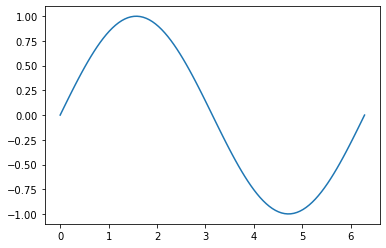

In [36]:
plt.plot(x.detach().numpy(), y.detach().numpy())

In [37]:
out = y.sum()

In [38]:
out.backward()

In [39]:
out

tensor(2.9986e-06, grad_fn=<SumBackward0>)

In [40]:
print(x.grad)

tensor([ 1.0000,  0.9980,  0.9920,  0.9819,  0.9679,  0.9501,  0.9284,  0.9029,
         0.8738,  0.8413,  0.8053,  0.7660,  0.7237,  0.6785,  0.6306,  0.5801,
         0.5272,  0.4723,  0.4154,  0.3569,  0.2969,  0.2358,  0.1736,  0.1108,
         0.0476, -0.0159, -0.0793, -0.1423, -0.2048, -0.2665, -0.3271, -0.3863,
        -0.4441, -0.5000, -0.5539, -0.6056, -0.6549, -0.7015, -0.7453, -0.7861,
        -0.8237, -0.8580, -0.8888, -0.9161, -0.9397, -0.9595, -0.9754, -0.9874,
        -0.9955, -0.9995, -0.9995, -0.9955, -0.9874, -0.9754, -0.9595, -0.9397,
        -0.9161, -0.8888, -0.8580, -0.8237, -0.7861, -0.7453, -0.7015, -0.6549,
        -0.6056, -0.5539, -0.5000, -0.4441, -0.3863, -0.3271, -0.2665, -0.2048,
        -0.1423, -0.0792, -0.0159,  0.0476,  0.1108,  0.1736,  0.2358,  0.2969,
         0.3569,  0.4154,  0.4723,  0.5272,  0.5801,  0.6306,  0.6785,  0.7237,
         0.7660,  0.8053,  0.8413,  0.8738,  0.9029,  0.9284,  0.9501,  0.9679,
         0.9819,  0.9920,  0.9980,  1.00

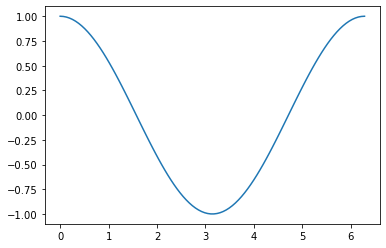

In [41]:
plt.plot(x.detach().numpy(), x.grad.numpy())

Matches what we expect.

### Example 2

$y_i = x_i^2$

$z_i = y_i^3$

$u = \sum_{i=1}^{N}(z_i)$

$\frac{\partial u}{\partial x_i} = \frac{\partial u }{\partial z_i} \frac{\partial z_i}{\partial y_i} \frac{\partial y_i}{\partial x_i}$

$\frac{\partial u }{\partial z_i} = 1$

$\frac{\partial z_i}{\partial y_i} = 3 y_i^2$

$\frac{\partial y_i}{\partial x_i} = 2 x_i$

$\frac{\partial u}{\partial x_i} = 1 * 3 y_i^2 * 2 x_i = 6 x_i^5$

In [43]:
x = torch.linspace(0,1,100,requires_grad=True)

In [44]:
y = torch.square(x)

In [45]:
z = torch.pow(y, 3)
u = z.sum()

In [46]:
u

tensor(14.6479, grad_fn=<SumBackward0>)

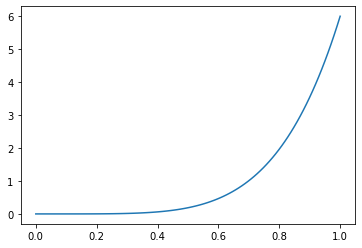

In [47]:
u.backward()

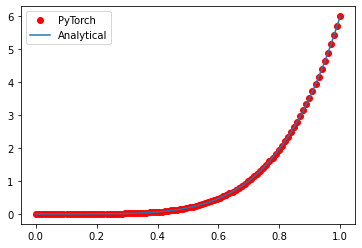

In [51]:
plt.plot(x.detach().numpy(), x.grad.numpy(), 'ro', label='PyTorch')

y2 = 6*x**5
plt.plot(x.detach().numpy(), y2.detach().numpy(), label='Analytical')
plt.legend()

### Example 3

$y_i = e^{x_i}$

$z_i=\text{sin}(y_i)$

$u=\sum_{i=1}^{N}(z_i)$

$\frac{\partial u}{\partial x_i} = \frac{\partial u}{\partial z_i} \frac{\partial z_i}{\partial y_i} \frac{\partial y_i}{\partial x_i}$

$\frac{\partial u}{\partial x_i} = 1 * \text{cos}(y_i) * e^{x_i} = 1 * \text{cos}(e^{x_i}) * e^{x_i}$ 

In [54]:
x = torch.linspace(0,2*np.pi,100,requires_grad=True)
y = torch.exp(x)
z = torch.sin(y)
u = z.sum()

u.backward()


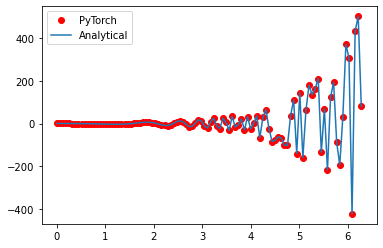

In [57]:
#analytical
z2 = torch.cos(y) * y 

plt.plot(x.detach().numpy(), x.grad.numpy(), 'ro', label='PyTorch')
plt.plot(x.detach().numpy(), z2.detach().numpy(), label='Analytical')
plt.legend()